/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


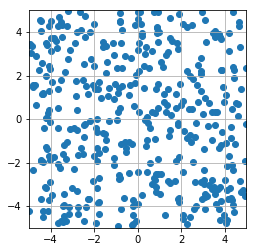

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import p1simulation as sim
%matplotlib inline
N = 400 
L = 10
Lmin=-L/2
Lmax = L/2
V = L*L
coords=np.random.uniform(low=Lmin, high=Lmax, size=(N,2))
dr = 0.01

plt.scatter(coords[:,0],coords[:,1])
plt.xlim([Lmin,Lmax])
plt.ylim([Lmin,Lmax])
plt.grid()
plt.axes().set_aspect("equal")

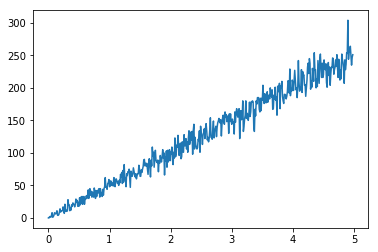

In [4]:
def pbc(d,L):
    return d - L * ((d+L/2)//L)

def rdf(coords,L,dr):
    rmax = L/2
    nbins = int(rmax//dr)
    r = np.array([i*dr for i in range(nbins)])    
    bins = np.zeros(nbins)
    for i,a in enumerate(coords[:-1]):#all but the last
        for b in coords[i+1:]:
            delta = b-a
            for h in range(2):
                delta[h] = pbc(delta[h],L)
            d = np.absolute(np.linalg.norm(delta))
            index = int(d//dr)
            if index<nbins:
                bins[index] += 1 
    #for i, b in enumerate(bins):
    #    bins[i] /= N*(N-1)*np.pi*(2*dr*(i+1)*dr)/(2*V) #normalize by volume of annulus AND number of pairs
    #Note: Number of Pairs is N*(N-1)/2 (Sum of numbers from 1 to N-1)    
        
    return r, bins
r,bins = rdf(coords, L, dr)
plt.plot(r,bins)

In [21]:
steps = 1000
T = 1.8
species = 'atoms'
D = 10
X = 0.30
mixed = 'n'
dr = 1

U_list, initial_array, final_array, moves = sim.run_simulation(steps, species, D, X, mixed, T)

Running Simulaton...
Simulation Complete:
Computation time = 0.55 s
Ratio of accepted moves = 0.56


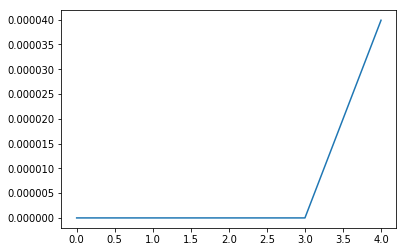

In [22]:
r,bins = rdf(final_array,D,dr)
plt.plot(r,bins)

In [15]:
print(bins)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [18]:
sys_array = sim.create_system(D, species, X, mixed)

In [20]:
species_sites = np.where(sys_array != 1)
print(species_sites)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),

In [41]:
#print(species_sites = np.where(sys_array != 1))

In [ ]:
def rdf_like(sys_array, species, dr):
    dmax = D/2
    nbins = (dmax//dr)
    coordinates, sites = sim.site_coordinates(sys_array, species)
    bins = np.zeros(nbins)
    r = np.array([i*dr for i in range(nbins)])
    for i, coord in enumerate(coordinates[:-2]): # i is index and coord is coordinate
        for n in coordinates[i+1:]:
            site1 = coord
            site2 = n
            dist = ((site2[0]-site1[0])**2+(site2[1]-site1[1])**2+(site2[2]-site1[2])**2)**(1/2)
            dist = pbc(d,D)
            bin_index = dist//dr
            bins[bin_index] += 1
    return bins, r

In [43]:
a = [0,0,0]
b = [9,9,9]
dist = ((b[0]-a[0])**2+(b[1]-a[1])**2+(b[2]-a[2])**2)**(1/2)
print(dist)
pbc_dist = pbc(dist,D)
print(pbc_dist)

15.588457268119896
-4.411542731880104
